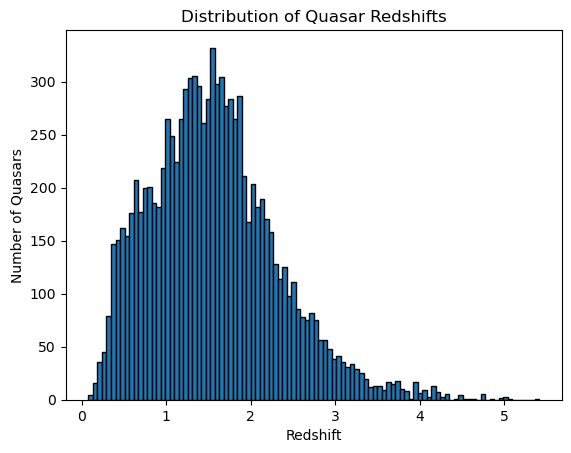

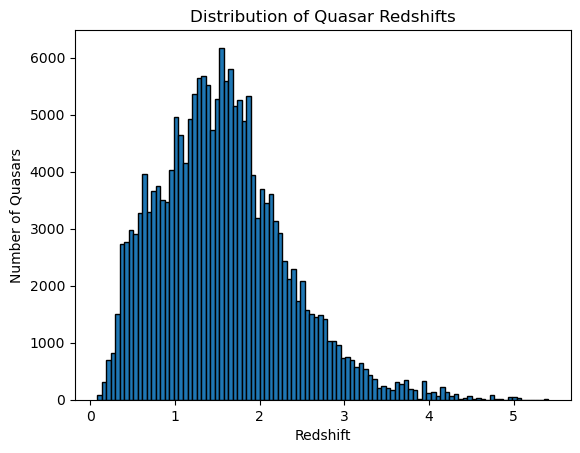

100
101


In [15]:
from astroML.datasets import fetch_dr7_quasar
import numpy as np
import matplotlib.pyplot as plt

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]
z = data['redshift']

# Generate 10000 random numbers between z.min() and z.max()
random_numbers = np.random.uniform(z.min(), z.max(), 1000000)
# Calculate the histogram
hist, bin_edges = np.histogram(z, bins=100, density=True)

#for i in 
# Find the bin index for each random number
bin_indices = np.digitize(random_numbers, bin_edges) - 1

# Get the histogram value for each random number
hist_values = hist[bin_indices]
accepted = []

for i in range(len(hist_values)):
    if np.random.uniform(0,1) < hist_values[i]:
        # Accept the random number
        accepted.append(random_numbers[i])



# Plot the histogram
plt.hist(z, bins=100, density=False, edgecolor='black')
plt.xlabel('Redshift')
plt.ylabel('Number of Quasars')
plt.title('Distribution of Quasar Redshifts')
plt.show()

# Plot the histogram
plt.hist(accepted, bins=100, density=False, edgecolor='black')
plt.xlabel('Redshift')
plt.ylabel('Number of Quasars')
plt.title('Distribution of Quasar Redshifts')
plt.show()

print(len(hist))
print(len(bin_edges))

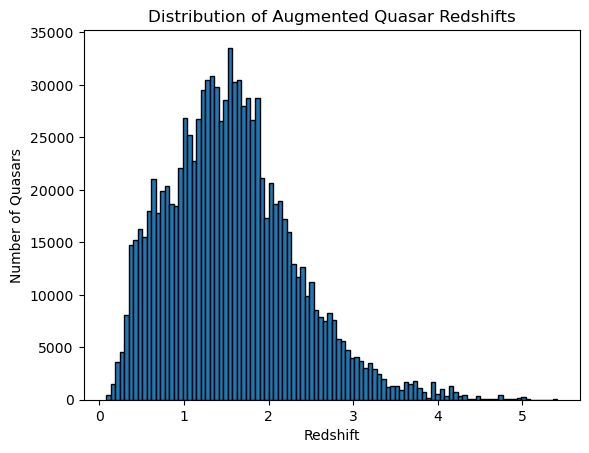

In [17]:
from scipy.interpolate import interp1d

# Calcolare la CDF del vettore z
sorted_z = np.sort(z)
cdf = np.arange(1, len(sorted_z) + 1) / len(sorted_z)

# Creare una funzione di interpolazione per la CDF inversa
inverse_cdf = interp1d(cdf, sorted_z, bounds_error=False, fill_value=(sorted_z[0], sorted_z[-1]))

# Generare nuovi dati utilizzando la CDF inversa
new_data_size = 1000000  # Numero di nuovi dati da generare
random_cdf_values = np.random.uniform(0, 1, new_data_size)
new_z = inverse_cdf(random_cdf_values)

# Aggiungere i nuovi dati al vettore z esistente
augmented_z = np.concatenate([z, new_z])

# Visualizzare i dati aumentati
plt.hist(augmented_z, bins=100, density=False, edgecolor='black')
plt.xlabel('Redshift')
plt.ylabel('Number of Quasars')
plt.title('Distribution of Augmented Quasar Redshifts')
plt.show()